<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>K-Means Clustering</center>

In this lab exercise, you will learn about <b>unsupervised learning</b>, namely about <b>k-means clustering</b></b>.

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered the one of the simplest model among them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 3 examples:
- k-means on a randome generated dataset
- k-means on IRIS dataset
- Using k-means for customer segmentation

### Import libraries
Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# k-Means on a randomly generated dataset
Lets create our own dataset for this lab!


First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b> <br>ex. random.seed(0)

In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

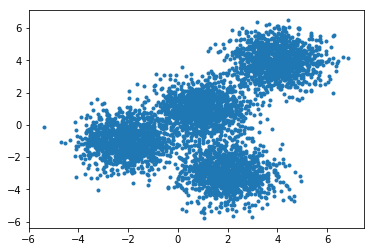

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

---
## Setting up K-Means
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n\_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n\_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b> 

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

---
## Creating the Visual Plot
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

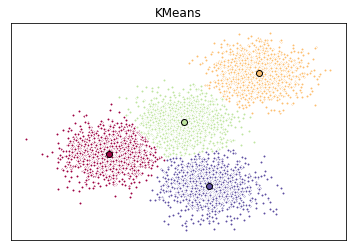

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


# k-Means on a IRIS dataset

Now, unsupervised learning is a bit <b>harder</b> to setup as it is where you don't have the <b>labels</b> for the categories in advanced and you try to <b>group</b> them based on their <b>similarities</b>. So for this portion we will be giving you the code to run as an <b>introduction</b> to an <b>algorithm</b> that can be used in <b>unsupervised learning - k-means clustering</b>. However, that doesn't mean you can't <b>practice</b> loading and setting up the data!

### Importing Libraries

Import the following libraries: 
<ol>- Axes3D from mpl_toolkits.mplot3d</ol>
<ol>- KMeans from sklearn.cluster</ol>
<ol>- load_iris from sklearn.datasets</ol>

<i>Note: It is presumed that numpy and matplotlib.pyplot are both imported as np and plt respectively from previous imports. If that is not the case, please import them!</i>

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris

Then we will set the <b>random seed</b> and the <b>centers</b> for <b>K-means</b>.

In [11]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

Using the <b> load_iris() </b> function, declare the iris datset as the variable <b>iris</b>

In [15]:
# Your code here



Double-click __here__ for the solution:


<!-- Type:

iris = load_iris()

-->

Also declare <b>X</b> as the <b>iris' data component</b>, and y as <b>iris' target component</b>

In [16]:
# Your code here



Double-click __here__ for the solution:


<!-- Type:

X = iris.data 
y = iris.target

-->

Now let's run the rest of the code and see what <b>K-Means produces!</b>

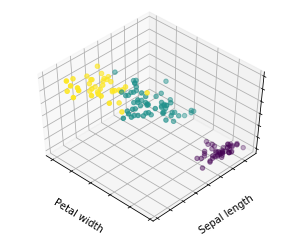

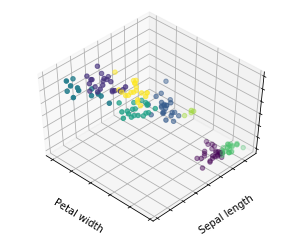

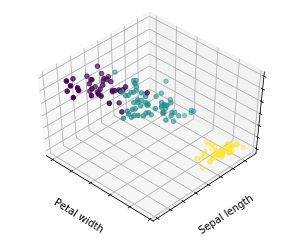

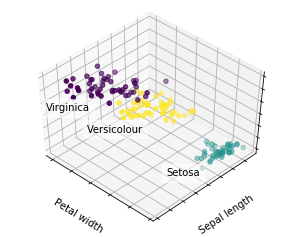

In [17]:
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

The following <b>plots</b> (1-3) show the different <b>end results</b> you obtain by using different <b>initalization processes</b>. <b>Plot 4</b> holds what the answer should be, however it is clear that <b>K-means</b> is <b>heavily reliant</b> on the <b>initalization</b> of the <b>centroid</b>.

The focus of this exercise is to <b>introduce</b> you to <b>basic training</b>, <b>testing</b>, and <b>plotting</b>. At this time, it's <b>not very important</b> to understand exactly how these <b>algorithms work</b>, as they will be explained in later lessons.


## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​